## M2 Homework: Proof of GPU-Enabled Notebook and MNIST questions

#### Student name: Jacob Mendez
#### Course: Deep Learning
#### Instructor: Dr. Linder
#### Semester: Spring 2025


In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

2025-02-14 15:42:47.309391: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-14 15:42:47.318079: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739565767.328412   30523 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739565767.331523   30523 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-14 15:42:47.349785: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


I0000 00:00:1739565769.016849   30523 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9558 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070, pci bus id: 0000:01:00.0, compute capability: 8.9


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


# Question Set 1: What GPU and Jupyter Notebook System are you Using?

### In plain language, what is the GPU that shows as available above?

### Answer: [____]

### What system (local, homelab, Google Colab, are you using?

### Answer: [____]


# MNIST

In [5]:

from tensorflow.keras.datasets import mnist # type: ignore
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

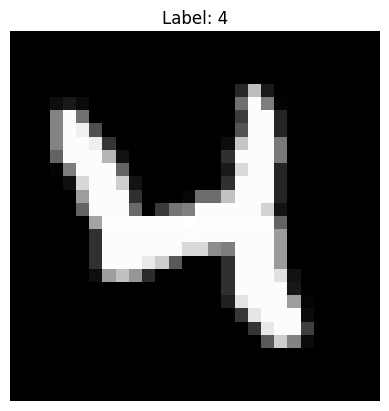

In [7]:
#visualize a single digit

import matplotlib.pyplot as plt
image_index = 20
first_image = train_images[image_index].reshape((28, 28))
plt.imshow(first_image, cmap='gray')
plt.title('Label: {}'.format(train_labels[image_index]))
plt.axis('off')  # Turn off axis labels
plt.show()

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

In [12]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers #type: ignore
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

Bad pipe message: %s [b'"Not(A:Brand";v="99", "Microsoft Edge";v="133", "Chromium']
Bad pipe message: %s [b'v="133"\r\nsec-ch-ua-mobile: ?0\r\nse', b'ch-ua-platform: "Windows"\r\nUpgrade-Insecure-Requests: 1\r\nUser-Agent: Mozilla/5.0 (Windows NT 10.0;', b'in64; x64) AppleWebKit/537.36 (', b'TML, like Gecko) Chrome/133.0.0.0 Safari/537.36 Edg/133.0.0.0\r\nAccept: tex']
Bad pipe message: %s [b'html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exch', b'ge;v=b3;q=0.7\r\nSec-Fetch-Site: none\r\nSec-Fetch-Mode: navigate\r\nSec-Fetch-User: ?1\r\nSec-Fetch-Des']
Bad pipe message: %s [b'ol: max-age=0\r\nsec-ch-ua: "Not(A:Brand";v="99", "Microsoft Edge";v="133", "Chromium";v="133"\r\nsec-ch-ua-mobile: ?0\r']
Bad pipe message: %s [b'ec-ch-ua-', b'atform: "Windows"\r\nUpgrade-Insecure-Requests: 1\r\nUser-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWeb']
Bad pipe message: %s [b't/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safa

**The compilation step**

In [14]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [15]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [16]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


I0000 00:00:1739565980.860537   30733 service.cc:148] XLA service 0x7f805c006c10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739565980.861619   30733 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2025-02-14 15:46:20.908468: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739565980.981952   30733 cuda_dnn.cc:529] Loaded cuDNN version 90300


 41/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6807 - loss: 1.1021

I0000 00:00:1739565982.808791   30733 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8748 - loss: 0.4424
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9655 - loss: 0.1159
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9788 - loss: 0.0712
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9848 - loss: 0.0500
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9892 - loss: 0.0363


**Using the model to make predictions**

In [17]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


array([1.38756615e-08, 2.51559551e-10, 5.18753325e-07, 4.45601103e-07,
       5.29003664e-12, 1.31621858e-09, 9.79447101e-13, 9.99998689e-01,
       1.45167389e-08, 3.06876984e-07], dtype=float32)

In [18]:
predictions[0].argmax()

np.int64(7)

In [19]:
predictions[0][7]

np.float32(0.9999987)

In [20]:
test_labels[0]

np.uint8(7)

**Evaluating the model on new data**

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9761 - loss: 0.0810
test_acc: 0.9789999723434448


# Question Set 2: Use the Above Code and Modify It to Answer:

### Find an example index of which prediction failed. What is the index?

### Answer: [____]

### Why did that prediction fail? Visualize the test data and explain why the prediction was wrong.

### Answer: [____]